In [1]:
import pandas as pd
import numpy as np

In [2]:
file = r"C:/Users/Aaditya Gupta/Downloads/HPC_BOOST-main/HPC_BOOST-1/unprocessed_data/mergesort.log"
file2 = r"C:/Users/Aaditya Gupta/Downloads/HPC_BOOST-main/HPC_BOOST-1/unprocessed_data/mergesort_COMPUTE_3.log"

In [3]:
with open(file) as f:
    f = f.readlines()
with open(file2) as f2:
    f2 = f2.readlines()

In [84]:
len(f2)

131751

In [4]:
def splitL(l,events):
    e = l[0].split(",")
    for i in range(1,len(l)):
        val=l[i].split(",")
        # print("HRERERE",val)
        if(val[0].isnumeric()):
            events[e[0]].append(val[1])
            events[e[1]].append(val[2])
            events[e[2]].append(val[3])
            count = 3
            # print(len(val))
            for v in range(4,len(val)-3,4):
                # print("Exists",e[count])
                if(e[count] not in events):
                        # print("Doesnt exist", e[count])
                        events[e[count]]=[]
                events[e[count]].append(val[v:v+4])
                count+=1
    # print(count)
    return events

In [5]:
def main(f_):
    s=""
    for i in f_:
        s+=i
    l = s.split("GID,")
    # print(l)
    for i in range(1,len(l)):
        e = l[i].split("\n")
        # print("eeeeeee",e)
        events={}
        # print(e)
        eve = e[0].split(",")
        # print("HERE2", eve)
        for j in range(len(eve)):
            events[eve[j]]=[]
            # print(events)
        for k in range(1,len(l)):
            # print(l[k])
            l_1_1 = l[k].split("\n")
            # print("After prinintg splitL")
            events=splitL(l_1_1,events)
        # print(len(events))
    return events

In [6]:
def to_csv_file(f_,name):
    p = main(f_)
    # print(p)
    min_len = len(p['TEMP_CORE'])
    max_len = len(p['TEMP_CORE'])
    maxkey="TEMP_CORE"
    minkey="TEMP_CORE"
    lenkey=[]

    for key in p:
        lenkey.append(len(p[key]))
        if key not in ['EventCount', 'CpuCount', 'Total runtime [s]']:
            if len(p[key]) < min_len:
                min_len = len(p[key])
                minkey = key
            if len(p[key]) > max_len:
                max_len = len(p[key])
                maxkey = key
    # print(min_len,max_len, minkey,"   ", maxkey)
    import matplotlib.pyplot as plt
    from matplotlib.axis import Axis 
    import matplotlib.pyplot as plt  
    import numpy as np  

    plt.bar(list(p.keys()), lenkey) 

    plt.show() 
    p_truncated = p.copy()
    for key in p:
        p_truncated[key] = p[key][:min_len]
    c=pd.DataFrame(p_truncated)
    path = "C:/Users/Aaditya Gupta/Downloads/HPC_BOOST-main/HPC_BOOST-1/convert/"+name+".csv"
    c_csv = pd.DataFrame.to_csv(c, path)
    return c_csv

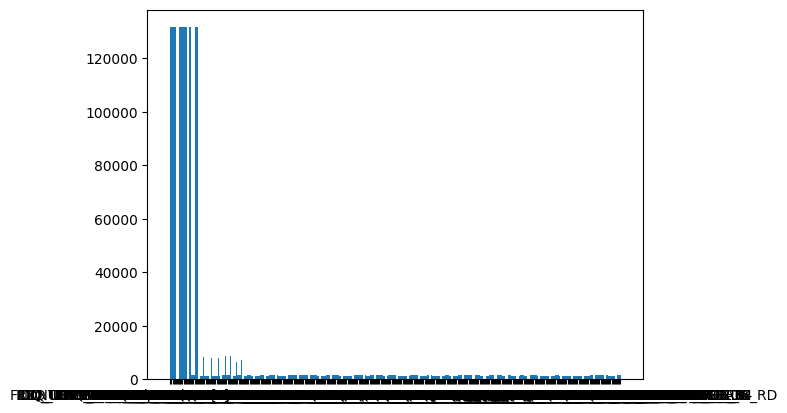

In [7]:
x=to_csv_file(f2,'merge_malicious')

In [8]:
p=main(f2)

{'EventCount': [], 'CpuCount': [], 'Total runtime [s]': [], 'TEMP_CORE': [], 'PWR_PKG_ENERGY': [], 'PWR_PP0_ENERGY': [], 'PWR_PP1_ENERGY': [], 'PWR_DRAM_ENERGY': [], 'PWR_PLATFORM_ENERGY': [], 'UNCORE_CLOCK': [], 'PP0_TEMP': [], 'PP1_TEMP': [], 'IO_REQUESTS': [], 'DRAM_READS': [], 'DRAM_WRITES': [], 'VOLTAGE_CORE': [], 'APERF': [], 'MPERF': [], 'PPERF': [], 'ICACHE_16B_IFDATA_STALL': [], 'ICACHE_64B_IFTAG_HIT': [], 'ICACHE_64B_IFTAG_MISS': [], 'ICACHE_64B_IFTAG_ALL': [], 'CACHE_LOOKUP_M': [], 'TRK_OCCUPANCY_ALL': [], 'TRK_REQUESTS_ALL': [], 'INSTR_RETIRED_ANY': [], 'CPU_CLK_UNHALTED_CORE': [], 'CPU_CLK_UNHALTED_REF': []}
HERE2
HRERERE ['1', '31', '4', '5.6230205504645e-05', '38.0', '38.0', '39.0', '38.0', '0.01824951171875', '0.0', '0.0', '0.0', '0.0074462890625', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.00189208984375', '0.0', '0.0', '0.0', '0.00030517578125', '0.0', '0.0', '0.0', '2965274.0', '0.0', '0.0', '0.0', '41.0', '0.0', '0.0', '0.0', '41.0', '0.0', '0.0', '0.0', '4

In [9]:
print(list(p.keys()))

['EventCount', 'CpuCount', 'Total runtime [s]', 'TEMP_CORE', 'PWR_PKG_ENERGY', 'PWR_PP0_ENERGY', 'PWR_PP1_ENERGY', 'PWR_DRAM_ENERGY', 'PWR_PLATFORM_ENERGY', 'UNCORE_CLOCK', 'PP0_TEMP', 'PP1_TEMP', 'IO_REQUESTS', 'DRAM_READS', 'DRAM_WRITES', 'VOLTAGE_CORE', 'APERF', 'MPERF', 'PPERF', 'ICACHE_16B_IFDATA_STALL', 'ICACHE_64B_IFTAG_HIT', 'ICACHE_64B_IFTAG_MISS', 'ICACHE_64B_IFTAG_ALL', 'CACHE_LOOKUP_M', 'TRK_OCCUPANCY_ALL', 'TRK_REQUESTS_ALL', 'INSTR_RETIRED_ANY', 'CPU_CLK_UNHALTED_CORE', 'CPU_CLK_UNHALTED_REF']


In [10]:
min_len = len(p['TEMP_CORE'])
max_len = len(p['TEMP_CORE'])
maxkey="TEMP_CORE"
minkey="TEMP_CORE"
lenkey=[]

for key in p:
    lenkey.append(len(p[key]))
    if key not in ['EventCount', 'CpuCount', 'Total runtime [s]']:
        if len(p[key]) < min_len:
            min_len = len(p[key])
            minkey = key
        if len(p[key]) > max_len:
            max_len = len(p[key])
            maxkey = key
print(min_len,max_len, minkey,"   ", maxkey)
p_truncated = p.copy()
for key in p:
    p_truncated[key] = p[key][:min_len]
c=pd.DataFrame(p_truncated)



4052 24312 PWR_PKG_ENERGY     CACHE_LOOKUP_M


In [11]:
{i:lenkey.count(i) for i in set(lenkey)}


{24312: 1, 4052: 24, 4053: 4}

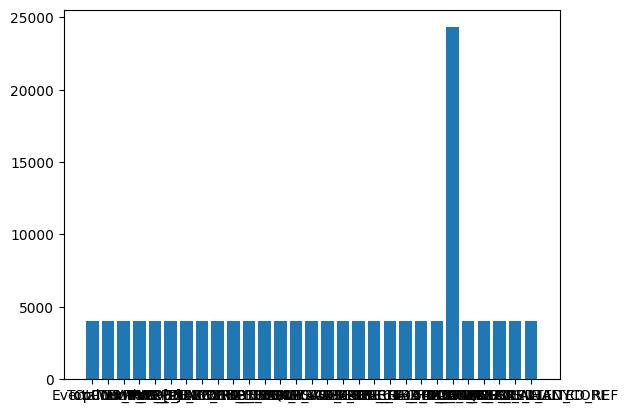

In [12]:
import matplotlib.pyplot as plt
from matplotlib.axis import Axis 
import matplotlib.pyplot as plt  
import numpy as np  

plt.bar(list(p.keys()), lenkey) 

plt.show() 

In [13]:
p_truncated = p.copy()
for key in p:
    p_truncated[key] = p[key][:min_len]

In [14]:
for key in p_truncated:
    print(len(p_truncated[key]))

4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052
4052


In [15]:
c=pd.DataFrame(p_truncated)


In [16]:
c.head()

EventCount CpuCount    Total runtime [s]                 TEMP_CORE  \
0         31        4  5.6230205504645e-05  [38.0, 38.0, 39.0, 38.0]   
1         31        4     0.01012710757042  [38.0, 39.0, 40.0, 40.0]   
2         31        4    0.020233245429833  [39.0, 39.0, 40.0, 40.0]   
3         31        4    0.030237580440874  [40.0, 40.0, 41.0, 41.0]   
4         31        4     0.04027313566707  [40.0, 38.0, 39.0, 38.0]   

                      PWR_PKG_ENERGY                     PWR_PP0_ENERGY  \
0  [0.01824951171875, 0.0, 0.0, 0.0]   [0.0074462890625, 0.0, 0.0, 0.0]   
1    [0.061767578125, 0.0, 0.0, 0.0]  [0.02935791015625, 0.0, 0.0, 0.0]   
2  [0.07135009765625, 0.0, 0.0, 0.0]      [0.0380859375, 0.0, 0.0, 0.0]   
3  [0.08038330078125, 0.0, 0.0, 0.0]  [0.04913330078125, 0.0, 0.0, 0.0]   
4  [0.05426025390625, 0.0, 0.0, 0.0]  [0.03302001953125, 0.0, 0.0, 0.0]   

                      PWR_PP1_ENERGY                    PWR_DRAM_ENERGY  \
0               [0.0, 0.0, 0.0, 0.0]  [0.00189208984375, 0.0, 0.0, 0.0]   
1   [0.0106201171875, 0.0, 0.0, 0.0]   [0.0118408203125, 0.0, 0.0, 0.0]   
2  [0.01153564453125, 0.0, 0.0, 0.0]     [0.01220703125, 0.0, 0.0, 0.0]   
3  [0.00604248046875, 0.0, 0.0, 0.0]  [0.00714111328125, 0.0, 0.0, 0.0]   
4  [0.00140380859375, 0.0, 0.0, 0.0]        [0.00390625, 0.0, 0.0, 0.0]   

                 PWR_PLATFORM_ENERGY                 UNCORE_CLOCK  ...  \
0  [0.00030517578125, 0.0, 0.0, 0.0]   [2965274.0, 0.0, 0.0, 0.0]  ...   
1  [0.00067138671875, 0.0, 0.0, 0.0]  [12366136.0, 0.0, 0.0, 0.0]  ...   
2  [0.00067138671875, 0.0, 0.0, 0.0]  [14656932.0, 0.0, 0.0, 0.0]  ...   
3  [0.00067138671875, 0.0, 0.0, 0.0]  [19115928.0, 0.0, 0.0, 0.0]  ...   
4  [0.00067138671875, 0.0, 0.0, 0.0]   [9989783.0, 0.0, 0.0, 0.0]  ...   

                       ICACHE_16B_IFDATA_STALL  \
0      [603894.0, 334125.0, 71532.0, 140280.0]   
1  [1780795.0, 1260140.0, 1458577.0, 728440.0]   
2    [777249.0, 1040488.0, 475203.0, 223491.0]   
3     [194273.0, 473168.0, 137875.0, 352304.0]   
4         [6272.0, 266564.0, 66895.0, 98592.0]   

                        ICACHE_64B_IFTAG_HIT  \
0    [777106.0, 383737.0, 39328.0, 122735.0]   
1  [638996.0, 848343.0, 1814326.0, 712477.0]   
2   [477655.0, 771677.0, 471326.0, 542003.0]   
3    [104718.0, 846875.0, 60978.0, 624459.0]   
4     [6850.0, 829528.0, 115611.0, 588751.0]   

                    ICACHE_64B_IFTAG_MISS  \
0   [144335.0, 71120.0, 15376.0, 30899.0]   
1  [120405.0, 70353.0, 157560.0, 66157.0]   
2    [96228.0, 78434.0, 75152.0, 38783.0]   
3    [24936.0, 55383.0, 16248.0, 43989.0]   
4     [2523.0, 51395.0, 14738.0, 33952.0]   

                        ICACHE_64B_IFTAG_ALL        CACHE_LOOKUP_M  \
0    [921441.0, 454857.0, 54704.0, 153634.0]  [0.0, 0.0, 0.0, 0.0]   
1  [759401.0, 918696.0, 1971886.0, 778634.0]  [0.0, 0.0, 0.0, 0.0]   
2   [573883.0, 850111.0, 546478.0, 580786.0]  [0.0, 0.0, 0.0, 0.0]   
3    [129654.0, 902258.0, 77226.0, 668448.0]  [0.0, 0.0, 0.0, 0.0]   
4     [9373.0, 880923.0, 130349.0, 622703.0]  [0.0, 0.0, 0.0, 0.0]   

              TRK_OCCUPANCY_ALL            TRK_REQUESTS_ALL  \
0    [7811701.0, 0.0, 0.0, 0.0]    [74838.0, 0.0, 0.0, 0.0]   
1  [325092673.0, 0.0, 0.0, 0.0]  [1287556.0, 0.0, 0.0, 0.0]   
2  [218555457.0, 0.0, 0.0, 0.0]  [1208765.0, 0.0, 0.0, 0.0]   
3   [38058953.0, 0.0, 0.0, 0.0]   [393518.0, 0.0, 0.0, 0.0]   
4   [10776942.0, 0.0, 0.0, 0.0]    [79573.0, 0.0, 0.0, 0.0]   

                             INSTR_RETIRED_ANY  \
0     [1522880.0, 775503.0, 58352.0, 121688.0]   
1  [945072.0, 1051813.0, 4530127.0, 1157913.0]   
2   [662489.0, 1584570.0, 779217.0, 1017552.0]   
3    [140557.0, 1243321.0, 83703.0, 1069586.0]   
4     [8060.0, 1996927.0, 229035.0, 1013701.0]   

                          CPU_CLK_UNHALTED_CORE  \
0    [3201698.0, 1902205.0, 308680.0, 592163.0]   
1  [5783047.0, 4410978.0, 6955005.0, 2976449.0]   
2  [2711118.0, 3880939.0, 2109367.0, 1486319.0]   
3    [706584.0, 4003954.0, 480950.0, 1828695.0]   
4    

In [20]:
c_csv = pd.DataFrame.to_csv(c, "C:/Users/Aaditya Gupta/Downloads/HPC_BOOST-main/HPC_BOOST/convert/CNN.csv")